<a href="https://colab.research.google.com/github/aquangnguyen1992/tensorflow_colab/blob/mnist_max/mnist_max.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import data from Google Drive and setup the workspace***

In [1]:
from google.colab import drive
import shutil

drive.mount('/content/drive')
shutil.copytree('/content/drive/My Drive/MNIST','/content/MNIST')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


'/content/MNIST'

In [2]:
train_data_path = '/content/MNIST/train_max_x'
test_data_path = '/content/MNIST/test_max_x'
label_file = '/content/MNIST/train_max_y.csv'

# ***Read the dataset and show an example***

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

dataset = pd.read_pickle(train_data_path).astype(np.uint8)
#test_data = pd.read_pickle(test_data_path)
train_label = pd.read_csv(label_file)
y = train_label['Label']

In [4]:
'''dataset = (dataset/255.0 - 0.5).astype(np.float16)
#test_data = test_data/255.0
number_of_label = np.unique(np.array(y), return_counts=True)
test_size = 0.8
X_train = dataset[:int(test_size*len(dataset))]
X_test = dataset[int(test_size*len(dataset)):]
Y_train = np.array(y)[:int(test_size*len(dataset))]
Y_test = np.array(y)[int(test_size*len(dataset)):]'''

number_of_label = np.unique(np.array(y), return_counts=True)
test_size = 0.8
X_train = dataset[:int(test_size*len(dataset))]
X_test = dataset[int(test_size*len(dataset)):]
Y_train = np.array(y)[:int(test_size*len(dataset))]
Y_test = np.array(y)[int(test_size*len(dataset)):]

def data_preprocessing(data):
  return data/255.0


7 [[0.67058824 0.47058824 0.44705882 ... 0.54901961 0.6745098  0.6627451 ]
 [0.63137255 0.67843137 0.42745098 ... 0.54509804 0.69803922 0.51764706]
 [0.72156863 0.71372549 0.56078431 ... 0.70588235 0.81960784 0.47058824]
 ...
 [0.4745098  0.60392157 0.58431373 ... 0.71764706 0.7254902  0.54901961]
 [0.51764706 0.58823529 0.58823529 ... 0.6745098  0.58039216 0.49411765]
 [0.52941176 0.66666667 0.62352941 ... 0.61960784 0.74509804 0.68627451]]


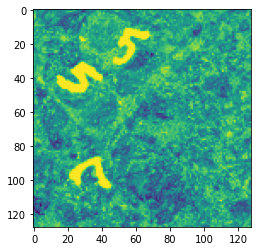

In [5]:
i = np.random.randint(0, X_train.shape[0])
sample = data_preprocessing(X_train)[i]
print(Y_train[i], sample)
plt.imshow(sample.astype(np.float32))

[[0.51764706 0.41176471 0.50588235 0.43921569 0.36862745 0.43921569
  0.36862745 0.44705882 0.45098039 0.57254902 0.83921569 0.96862745
  0.75294118 0.71372549 0.69803922 0.71372549 0.7372549  0.64313725
  0.75686275 0.78039216 0.64705882 0.52941176 0.55294118 0.41176471
  0.42352941 0.41960784 0.23529412 0.41960784 0.4627451  0.5254902 ]
 [0.46666667 0.34901961 0.42745098 0.34901961 0.4        0.31372549
  0.43921569 0.3254902  0.47058824 0.68627451 0.62745098 0.75686275
  0.80392157 0.72156863 0.85098039 0.69019608 0.50196078 0.70196078
  0.7372549  0.70980392 0.7254902  0.62745098 0.50588235 0.28235294
  0.37647059 0.4627451  0.36862745 0.39215686 0.61960784 0.3254902 ]
 [0.44313725 0.41568627 0.42745098 0.49803922 0.5372549  0.4627451
  0.41960784 0.37254902 0.4        0.51372549 0.5372549  0.63137255
  0.67058824 0.70980392 0.81176471 0.62745098 0.65098039 0.7372549
  0.68627451 0.66666667 0.75686275 0.7254902  0.50196078 0.22745098
  0.22745098 0.30980392 0.21176471 0.30980392 0.

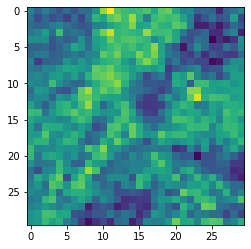

In [6]:
display = sample[55:85, 40:70]
plt.imshow(display.astype(np.float32))
print(display)

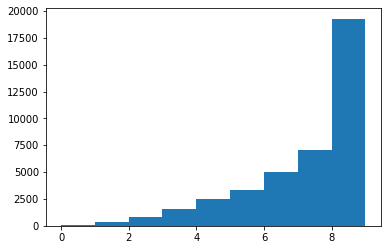

In [7]:
#X_train = np.expand_dims(X_train, axis=3)
#X_test = np.expand_dims(X_test, axis=3)

#print(X_train.shape, X_test.shape)
plt.hist(np.array(Y_train), bins=range(len(number_of_label[0])))
number_of_label[0]

b = np.zeros((Y_train.size, Y_train.max()+1))
b[np.arange(Y_train.size),Y_train] = 1
Y_train = b

b = np.zeros((Y_test.size, Y_test.max()+1))
b[np.arange(Y_test.size),Y_test] = 1
Y_test = b

#def data_preprocessing2(data):
#  dataout = (data/255.0)
#  #dataout = np.expand_dims(dataout, axis=3)
#  return dataout

#print(data_preprocessing2(X_train).shape, data_preprocessing2(X_test).shape)

# ***Pipeline X***

28 (28, 28, 3)


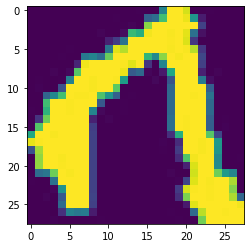

In [8]:
import cv2
def value_crop(input_im, output_size=(28,28), max_detection=3):
  if np.max(input_im) <= 2:
    input_im = (input_im*255)
  #print(input_im.shape, input_im[0])
  ret, black_white = cv2.threshold(input_im, 254, 255, 0)
  contours, hierarchy = cv2.findContours(black_white, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  cropped_section = None

  contour_info = []
  for contour in contours:
    point1 = np.min(contour, axis=0)[0]
    point2 = np.max(contour, axis=0)[0]
    if (point2[0] - point1[0] < 7) and (point2[1] - point1[1] < 7):
       continue
    else:
      contour_info.append([point1, point2, np.linalg.norm(point2-point1)])
      contour_info = sorted(contour_info, key=lambda contour: contour[2], reverse=True)
  #point1 = contour_info[2][0]
  #point2 = contour_info[2][1]
  #plt.imshow(black_white[point1[1]:point2[1], point1[0]:point2[0]])

  # What happen if less than 3 detection
  if len(contour_info) <= max_detection:
    for contour in contour_info:
      point1 = contour[0]
      point2 = contour[1]
      if cropped_section is None:
        cropped_section = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
        cropped_section = np.expand_dims(cropped_section, axis=2)
      else:
        temp_im = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
        temp_im = np.expand_dims(temp_im, axis=2)
        cropped_section = np.concatenate((cropped_section, temp_im), axis=2)
    
    # Padding to have max_detection
    padding = max_detection - len(contour_info)
    for i in range(0, padding):
      temp_im = np.zeros(output_size)
      temp_im = np.expand_dims(temp_im, axis=2)
      cropped_section = np.concatenate((cropped_section, temp_im), axis=2)

  else: # More than 3 detections, get the 3 with biggest size
    for contour in contour_info[:3]:
      #print("Here 2")
      point1 = contour[0]
      point2 = contour[1]
      if cropped_section is None:
        cropped_section = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
        cropped_section = np.expand_dims(cropped_section, axis=2)
      else:
        temp_im = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
        temp_im = np.expand_dims(temp_im, axis=2)
        cropped_section = np.concatenate((cropped_section, temp_im), axis=2)     

  return cropped_section

output = value_crop(sample.astype(np.uint8), output_size=(28,28))
print(len(output), output.shape)
plt.imshow(output[:,:,np.random.randint(0, output.shape[2])])

In [9]:
def pipeline_X(data):
  #print(data.shape)
  dataout = None
  for each_image in data:
    new_detection = value_crop(each_image)
    if new_detection is not None:
      new_detection = np.expand_dims(new_detection, axis=0)
      if dataout is None:
        dataout = new_detection
      else:
        #print(dataout.shape, new_detection.shape)
        dataout = np.concatenate((dataout, new_detection), axis=0)
  return dataout

#result = pipeline_X(X_train)
#print(result.shape)


In [10]:
def Pipeline_X_2(data):
  dataout = None
  output_size = (28,28)
  max_detection = 3
  new_detection = None
  for each_image in data:    
    proto_tensor = tf.make_tensor_proto(each_image)
    input_im = tf.make_ndarray(proto_tensor)
    if input_im.shape[0] == 1:
      input_im = np.squeeze(input_im, axis=0)

    ret, black_white = cv2.threshold(input_im, 254, 255, 0)
    contours, hierarchy = cv2.findContours(black_white, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cropped_section = None

    contour_info = []
    for contour in contours:
      point1 = np.min(contour, axis=0)[0]
      point2 = np.max(contour, axis=0)[0]
      if (point2[0] - point1[0] < 7) and (point2[1] - point1[1] < 7):
        continue
      else:
        contour_info.append([point1, point2, np.linalg.norm(point2-point1)])
        contour_info = sorted(contour_info, key=lambda contour: contour[2], reverse=True)

    # What happen if less than 3 detection
    if len(contour_info) <= max_detection:
      for contour in contour_info:
        point1 = contour[0]
        point2 = contour[1]
        if cropped_section is None:
          cropped_section = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
          cropped_section = np.expand_dims(cropped_section, axis=2)
        else:
          temp_im = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
          temp_im = np.expand_dims(temp_im, axis=2)
          cropped_section = np.concatenate((cropped_section, temp_im), axis=2)
      
      # Padding to have max_detection
      padding = max_detection - len(contour_info)
      for i in range(0, padding):
        temp_im = np.zeros(output_size)
        temp_im = np.expand_dims(temp_im, axis=2)
        cropped_section = np.concatenate((cropped_section, temp_im), axis=2)

    else: # More than 3 detections, get the 3 with biggest size
      for contour in contour_info[:3]:
        point1 = contour[0]
        point2 = contour[1]
        if cropped_section is None:
          cropped_section = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
          cropped_section = np.expand_dims(cropped_section, axis=2)
        else:
          temp_im = cv2.resize(black_white[point1[1]:point2[1], point1[0]:point2[0]], output_size, interpolation=cv2.INTER_CUBIC)
          temp_im = np.expand_dims(temp_im, axis=2)
          cropped_section = np.concatenate((cropped_section, temp_im), axis=2)

    new_detection = cropped_section

    if new_detection is not None:
      new_detection = np.expand_dims(new_detection, axis=0)
      if dataout is None:
        dataout = new_detection
      else:
        #print(dataout.shape, new_detection.shape)
        dataout = np.concatenate((dataout, new_detection), axis=0)
 

  return dataout

In [11]:
def Processed_X_map(input_im, output_size=(28,28), max_detection=3):
  proto_tensor = tf.make_tensor_proto(input_im)
  input_im = tf.make_ndarray(proto_tensor)
  #print(input_im.shape)

  ret, black_white = cv2.threshold(input_im, 254, 255, 0)
  contours, hierarchy = cv2.findContours(black_white, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  cropped_section = None
  contour_info = []
  
  for contour in contours:
    point1 = np.min(contour, axis=0)[0]
    point2 = np.max(contour, axis=0)[0]
    if ((point2[0] - point1[0] < 8) and (point2[1] - point1[1] < 8)) or (point2[0] == point1[0]) or (point2[1] == point1[1]):
       continue
    else:
      contour_info.append([point1, point2, np.linalg.norm(point2-point1)])
      contour_info = sorted(contour_info, key=lambda contour: contour[2], reverse=True)

  # What happen if less than 3 detection
  if len(contour_info) <= max_detection:
    for contour in contour_info:
      point1 = contour[0]
      point2 = contour[1]
      if cropped_section is None:
        im = black_white[point1[1]:point2[1], point1[0]:point2[0]]
        cropped_section = tf.image.resize_with_pad(np.expand_dims(im, axis=2), target_height=28, target_width=28).numpy()
      else:
        im = black_white[point1[1]:point2[1], point1[0]:point2[0]]
        temp_im = tf.image.resize_with_pad(np.expand_dims(im, axis=2), target_height=28, target_width=28).numpy()
        cropped_section = np.concatenate((cropped_section, temp_im), axis=2)
    
    # Padding to have max_detection
    padding = max_detection - len(contour_info)
    for i in range(0, padding):
      temp_im = np.zeros(output_size)
      temp_im = np.expand_dims(temp_im, axis=2)
      if cropped_section is None:
        cropped_section = temp_im
      else:
        cropped_section = np.concatenate((cropped_section, temp_im), axis=2)

  else: # More than 3 detections, get the 3 with biggest size
    for contour in contour_info[:3]:
      point1 = contour[0]
      point2 = contour[1]
      if cropped_section is None:
        im = black_white[point1[1]:point2[1], point1[0]:point2[0]]
        cropped_section = tf.image.resize_with_pad(np.expand_dims(im, axis=2), target_height=28, target_width=28).numpy()
      else:
        im = black_white[point1[1]:point2[1], point1[0]:point2[0]]
        temp_im = tf.image.resize_with_pad(np.expand_dims(im, axis=2), target_height=28, target_width=28).numpy()
        cropped_section = np.concatenate((cropped_section, temp_im), axis=2)
  
  #print(cropped_section.shape)
  return cropped_section

In [169]:
'''#test = tf.data.Dataset.from_tensor_slices([[1,2,3], [4,5,6], [7,8,9]])

test = tf.constant([[1,2,3], [4,5,6], [7,8,9]])
dataset = tf.data.Dataset.from_tensors(test)

def my_func(input_data):
  print(input_data)
  return input_data

dataset.map(my_func)
#proto_tensor = tf.make_tensor_proto(test)
#input_im = tf.make_ndarray(proto_tensor)
#print(test)
for element in dataset:
  print(element)'''

Tensor("args_0:0", shape=(3, 3), dtype=int32)
tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)


In [57]:
import tensorflow as tf
train_size = 1000
val_start = 35000
val_size = 200
#dataset = tf.data.Dataset.from_tensor_slices(X_train)

dataset = tf.data.Dataset.from_tensors(X_train[:train_size])
val_dataset = tf.data.Dataset.from_tensors(X_train[val_start:val_start+val_size])

#mapped_data = dataset.map(lambda x: tf.py_function(func=Processed_X_map, inp=[x, (28,28), 3], Tout=tf.float32))

def my_map_func(x):
  return tf.map_fn(lambda in_x: tf.py_function(func=Processed_X_map, inp=[in_x, (28,28), 3], Tout=tf.uint8), x)

def def_shape(detection):
  detection.set_shape([None, 28, 28, 3])
  #labels.set_shape([None,])
  return detection

data_mapped = dataset.map(my_map_func)
data_mapped = data_mapped.map(def_shape)

val_dataset_mapped = val_dataset.map(my_map_func)
val_dataset_mapped = val_dataset_mapped.map(def_shape)
#list(data_mapped.as_numpy_iterator())

#for element in data_mapped:
#  print(element.shape)

In [58]:
batch_size = 64
label_set = tf.data.Dataset.from_tensors(Y_train[:train_size])
label_val = tf.data.Dataset.from_tensors(Y_train[val_start:val_start+val_size])

dataset_to_train = tf.data.Dataset.zip((data_mapped, label_set))
dataset_to_val = tf.data.Dataset.zip((val_dataset_mapped, label_val))
#batch_data = dataset_to_train.batch(batch_size)
dataset_to_train.element_spec
#for element in dataset_to_train.in

(TensorSpec(shape=(None, 28, 28, 3), dtype=tf.uint8, name=None),
 TensorSpec(shape=(1000, 10), dtype=tf.float64, name=None))

# ***Keras Solution***

In [72]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l1_l2

In [76]:
def create_model(conv2d_1=32, str_1=1, conv2d_2=32, str_2=1, dense_node=32, dr=0.0, l1=0.005, l2=0.005):
  my_model = Sequential()
  my_model.add(Conv2D(conv2d_1, kernel_size=(3,3), strides=(str_1, str_1), activation='relu', input_shape=(28, 28, 3), kernel_regularizer=l1_l2(l1, l2)))
  my_model.add(Conv2D(conv2d_1, kernel_size=(3,3), activation='relu', kernel_regularizer=l1_l2(l1, l2)))
  my_model.add(MaxPool2D(pool_size=(2,2)))
  my_model.add(Flatten())
  my_model.add(Dropout(dr))
  my_model.add(BatchNormalization())
  my_model.add(Dense(dense_node, activation='relu', kernel_regularizer=l1_l2(l1, l2)))
  my_model.add(Dropout(dr))
  my_model.add(Dense(len(number_of_label[0]), activation='softmax'))


  optimizerAdam = Adam(lr=0.001, amsgrad=True)
  optimizerSGD = SGD(learning_rate=0.005, momentum=0.001, nesterov=False)
  
  my_model.compile(loss='categorical_crossentropy',
                optimizer=optimizerAdam,
                metrics=['accuracy'])

  #my_model.compile(loss='sparse_categorical_crossentropy',
  #              optimizer=optimizerSGD,
  #              metrics=['accuracy'])
  
  return my_model

In [78]:
my_model = create_model(conv2d_1=16, str_1=2, conv2d_2=128, str_2=1, dense_node=128, dr=0.45, l1=0.005, l2=0.001)
my_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 13, 13, 16)        448       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 400)               0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 400)               0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 400)               1600      
_________________________________________________________________
dense_26 (Dense)             (None, 128)             

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
filepath="weight_model_cnn_best.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', save_weights_only=False, verbose=1, save_best_only=True, mode='max')

batch_size = 64
for i in range (0, int(X_train[:val_start].shape[0]/(batch_size*10))-1):
  print("BATCH " + str(i))
  train_set = X_train[batch_size*10*i:batch_size*10*(i+1)]
  
  label_set = tf.data.Dataset.from_tensors(Y_train[batch_size*10*i:batch_size*10*(i+1)])
  dataset = tf.data.Dataset.from_tensors(train_set)
  
  data_mapped = dataset.map(my_map_func)
  data_mapped = data_mapped.map(def_shape)
  dataset_to_train = tf.data.Dataset.zip((data_mapped, label_set))

  history = my_model.fit(
    dataset_to_train,
    epochs=20, verbose=1, shuffle=True,
    batch_size=batch_size, validation_data=dataset_to_val,
    callbacks=[early_stop, checkpoint])

BATCH 0
Epoch 1/20
1/1 [==============================] - ETA: 0s - loss: 18.1765 - accuracy: 0.0766
Epoch 00001: val_accuracy improved from -inf to 0.10500, saving model to weight_model_cnn_best.h5
1/1 [==============================] - 3s 3s/step - loss: 18.1765 - accuracy: 0.0766 - val_loss: 30.1922 - val_accuracy: 0.1050
Epoch 2/20
1/1 [==============================] - ETA: 0s - loss: 17.9402 - accuracy: 0.0828
Epoch 00002: val_accuracy improved from 0.10500 to 0.11000, saving model to weight_model_cnn_best.h5
1/1 [==============================] - 3s 3s/step - loss: 17.9402 - accuracy: 0.0828 - val_loss: 25.1119 - val_accuracy: 0.1100
Epoch 3/20
1/1 [==============================] - ETA: 0s - loss: 17.6964 - accuracy: 0.0938
Epoch 00003: val_accuracy did not improve from 0.11000
1/1 [==============================] - 3s 3s/step - loss: 17.6964 - accuracy: 0.0938 - val_loss: 22.4863 - val_accuracy: 0.1100
Epoch 4/20
1/1 [==============================] - ETA: 0s - loss: 17.3497 -

In [1]:
plt.subplot(211)
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'], 'r')

plt.subplot(212)
plt.plot(history.history['accuracy'], '--b')
plt.plot(history.history['val_accuracy'], '--r')

NameError: ignored